<a href="https://colab.research.google.com/github/Farhansyah15/PraktikumML156-22/blob/main/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dropout, SpatialDropout2D, BatchNormalization

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/Machine Learning

/content/drive/MyDrive/Machine Learning


In [24]:
!ls

data-master  split_data  xtrain64.npy  xval64.npy  ytrain64.npy  yval64.npy


In [25]:
x_train = np.load("xtrain64.npy")
x_val = np.load("xval64.npy")
y_train = np.load("ytrain64.npy")
y_val = np.load("yval64.npy")

In [26]:
# build a simple model
model = Sequential()
model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(Flatten())

# fully connected
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 spatial_dropout2d (SpatialD  (None, 150, 150, 32)     0         
 ropout2D)                                                       
                                                                 
 batch_normalization_10 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        18496     
                                                      

In [27]:
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# training & saving history of every epoch
H = model.fit(x_train, y_train, 
              batch_size=64, 
              epochs=100, 
              validation_data=(x_val, y_val), 
              verbose=2)

Epoch 1/100
137/137 - 25s - loss: -1.8753e+05 - accuracy: 0.2484 - val_loss: -5.8129e+05 - val_accuracy: 0.2482 - 25s/epoch - 185ms/step
Epoch 2/100
137/137 - 14s - loss: -2.1875e+06 - accuracy: 0.2485 - val_loss: -3.6984e+06 - val_accuracy: 0.2482 - 14s/epoch - 104ms/step
Epoch 3/100
137/137 - 15s - loss: -9.1702e+06 - accuracy: 0.2484 - val_loss: -1.2971e+07 - val_accuracy: 0.2482 - 15s/epoch - 106ms/step
Epoch 4/100
137/137 - 14s - loss: -2.4441e+07 - accuracy: 0.2484 - val_loss: -3.2985e+07 - val_accuracy: 0.2482 - 14s/epoch - 104ms/step
Epoch 5/100
137/137 - 15s - loss: -5.1615e+07 - accuracy: 0.2484 - val_loss: -6.4915e+07 - val_accuracy: 0.2482 - 15s/epoch - 106ms/step
Epoch 6/100
137/137 - 14s - loss: -9.3607e+07 - accuracy: 0.2484 - val_loss: -1.1372e+08 - val_accuracy: 0.2482 - 14s/epoch - 104ms/step
Epoch 7/100
137/137 - 14s - loss: -1.5271e+08 - accuracy: 0.2484 - val_loss: -1.8295e+08 - val_accuracy: 0.2482 - 14s/epoch - 104ms/step
Epoch 8/100
137/137 - 14s - loss: -2.3188

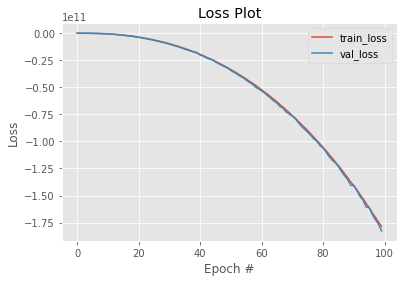

In [30]:
# plotting loss
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

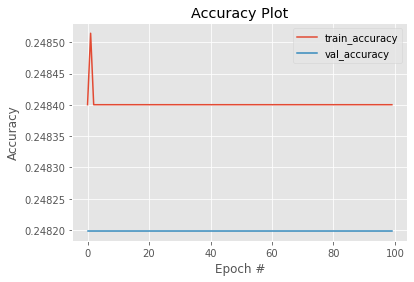

In [31]:
# plotting accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
# classification report
pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)
print(classification_report(y_val, labels))

40/40 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       313
           1       0.25      1.00      0.40       310
           2       0.00      0.00      0.00       309
           3       0.00      0.00      0.00       317

    accuracy                           0.25      1249
   macro avg       0.06      0.25      0.10      1249
weighted avg       0.06      0.25      0.10      1249



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metr